In [1]:
from gpstools import parser, viz
from gpstools.gpstrack import *

In [2]:
# Cooler777
yarik_su2 = parser.load_gpx_track('data/yarik_medved/Log_20190113_150647.gpx')
#yarik_su2.print_stats()

yarik_su2_segments = yarik_su2.determine_activity_segments(allowed_pause = 1, segment_duration_threshold = 5)
#for segment in yarik_su2_segments:
#   segment.print_stats()
    
yarik_su2 = yarik_su2.crop_track_to_segment(yarik_su2_segments[3], 'cooler777')
yarik_su2.set_speed_smoothing(10)
yarik_su2.print_stats()

Load track data/yarik_medved/Log_20190113_150647.gpx with 16603 points
Track cooler777
Start time: 2019-01-13 11:53:00.350000
End time: 2019-01-13 12:01:56.470000
Total time: 0:08:56.120000
Total distance travelled: 11.259 km
Total average speed: 75.60 kph
Max speed: 158.47 kph
Average speed: 75.93 kph




In [3]:
# rusabakumov
rusabakumov_su2 = parser.load_gpx_track('data/medved/su2.gpx')
#rusabakumov_su2.print_stats()

rusabakumov_su2_segments = rusabakumov_su2.determine_activity_segments(allowed_pause = 5, segment_duration_threshold = 5)
#for segment in rusabakumov_su2_segments:
#    segment.print_stats()
    
rusabakumov_su2 = rusabakumov_su2.crop_track_to_segment(rusabakumov_su2_segments[1], 'rusabakumov')
rusabakumov_su2.set_speed_smoothing(10)
rusabakumov_su2.print_stats()

Load track data/medved/su2.gpx with 6263 points
Looks that track has incorrect milliseconds presicion format (i.e written by Harry's Lap Timer). Fixing
Track rusabakumov
Start time: 2019-01-13 11:37:00.800000
End time: 2019-01-13 11:46:13.200000
Total time: 0:09:12.400000
Total distance travelled: 11.340 km
Total average speed: 73.90 kph
Max speed: 142.88 kph
Average speed: 73.96 kph




In [4]:
# maxmir
maxmir_su2 = parser.load_racechrono_csv_track('data/medved/maxmir.csv')
#maxmir_track.print_stats()

maxmir_segments = maxmir_su2.determine_activity_segments(allowed_pause = 5, segment_duration_threshold = 5)
# for segment in maxmir_segments:
#     segment.print_stats()
    
maxmir_su2 = maxmir_su2.crop_track_to_segment(maxmir_segments[0], 'maxmir')
maxmir_su2.set_speed_smoothing(1)
maxmir_su2.print_stats()

Load racechrono track data/medved/maxmir.csv with 4169 points
Track maxmir
Start time: 2019-01-13 14:57:01
End time: 2019-01-13 15:06:06
Total time: 0:09:05
Total distance travelled: 11.388 km
Total average speed: 75.22 kph
Max speed: 145.60 kph
Average speed: 74.95 kph




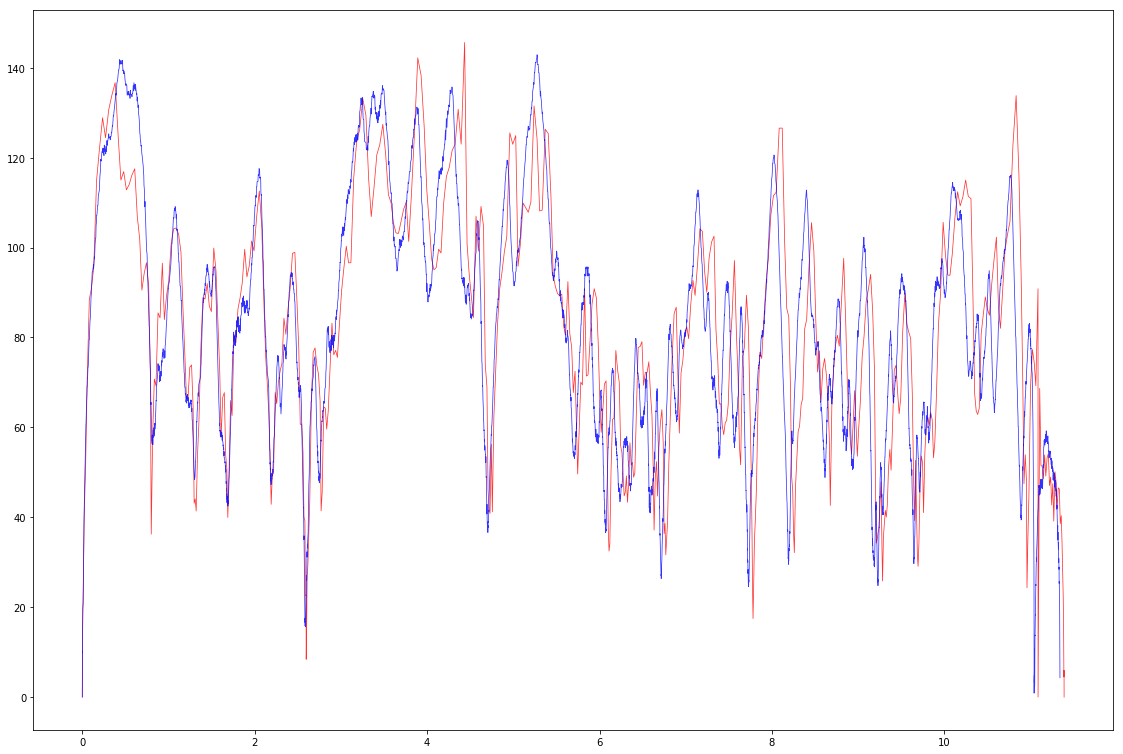

In [5]:
viz.plot_distance_speed_graph([maxmir_su2, rusabakumov_su2])

In [6]:
viz.generate_distance_speed_graph('medved_su2', 'Медведь СУ2', [yarik_su2, rusabakumov_su2, maxmir_su2])